# Data Engineering and Analysis

This file contains the data engineering and analysis part. In the next file, we train the models and perform model selection.

***************************************************************************************************************************

### Part 1 Data Engineering

Declaring all the needed importse

In [34]:
import pandas as pd
from prettytable import PrettyTable
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
import seaborn as sns
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score

Loading the Data

In [35]:
# load the csv file
DiabeticDataset = pd.read_csv('diabetic_data.csv')
#Data2 Backup
data_backup = DiabeticDataset.copy()
#Display fields
DiabeticDataset.head(2).T

,0,1
encounter_id,2278392,149190
patient_nbr,8222157,55629189
race,Caucasian,Caucasian
gender,Female,Female
age,[0-10),[10-20)
weight,?,?
admission_type_id,6,1
discharge_disposition_id,25,1
admission_source_id,1,7
time_in_hospital,1,3


In [36]:
#Print dataset info for each column
print(DiabeticDataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Initially, total number of features is 49 and # of examples is 101766

In [37]:
#Function that calculates number of features and number of examples in the data
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys()) - 1))
  print('- # of examples = %d' % len(dataset))
#print results from printBasicStats on Diabetes dataset
printBasicStats(DiabeticDataset)

- # of features = 49
- # of examples = 101766


Now we will focus on the data cleaning. We will go one feature at a time.

Lets check the percentabloe of null 

In [38]:
#finding null values
DiabeticDataset.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the results below, we could see that wight, payer code, medical specialty Have high percentage of missing values. We will drop them later.
The ones with small percentage missing values, we need to come up with a strategy on how to replace them or just drop those rows. 

In [39]:
#creating a table to show percentage of missing values in each column
t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])
#Loop through each column get total number of missing values then calculate percentage
for col in DiabeticDataset.columns :
    lenn = len(DiabeticDataset[DiabeticDataset[col] == '?'])
    t.add_row([col,lenn,(lenn / len(DiabeticDataset)*100)])
print(t)

+--------------------------+----------------+---------------------+
|       Column Name        | Missing Values |  Missing Percentage |
+--------------------------+----------------+---------------------+
|       encounter_id       |       0        |         0.0         |
|       patient_nbr        |       0        |         0.0         |
|           race           |      2273      |  2.2335554114340743 |
|          gender          |       0        |         0.0         |
|           age            |       0        |         0.0         |
|          weight          |     98569      |  96.85847925633315  |
|    admission_type_id     |       0        |         0.0         |
| discharge_disposition_id |       0        |         0.0         |
|   admission_source_id    |       0        |         0.0         |
|     time_in_hospital     |       0        |         0.0         |
|        payer_code        |     40256      |   39.5574160328597  |
|    medical_specialty     |     49949      |  4

### Race 

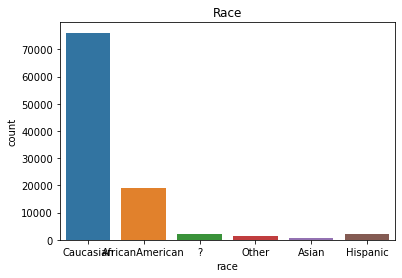

In [40]:
#Print count for each race category
DiabeticDataset['race'].value_counts()
#plot the results
sns.countplot(x = 'race', data = DiabeticDataset)
plt.title("Race")
plt.show()

Race has missing values '?' with less than 2000 rows. We decided we will replace the ? values with the majority category which is caucasian

In [41]:
#drop the missing value
DiabeticDataset = DiabeticDataset[DiabeticDataset.race != '?']
#Map the categories to numerical values
DiabeticDataset['race'] = DiabeticDataset['race'].apply(lambda x : 1 if x == 'Caucasian' 
                                                            else ( 2 if x == 'AfricanAmerican'                                                          
                                                            else ( 3 if x == 'Asian'
                                                            else ( 4 if x == 'Other'
                                                            else ( 5 if x == 'Hispanic'
                                                            else  0)))))
#Print new count
DiabeticDataset['race'].value_counts()

1    76099
2    19210
5     2037
4     1506
3      641
Name: race, dtype: int64

### Gender

We have a very small number of unknowns for Gender. We decided to drop them.

In [42]:
#drop the 2 missing values
DiabeticDataset = DiabeticDataset[DiabeticDataset.gender != 'Unknown/Invalid']
#map gender categories to numerical values
DiabeticDataset['gender'] = DiabeticDataset['gender'].apply(lambda x : 1 if x == 'Female' 
                                                            else  0)
#New count
DiabeticDataset['gender'].value_counts()

1    53575
0    45917
Name: gender, dtype: int64

### Age

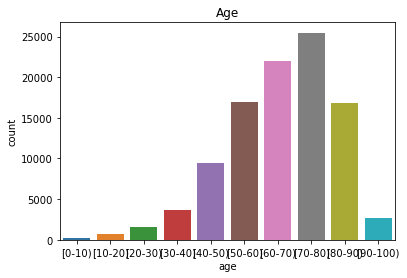

In [43]:
#Plot the age columns distribution
sns.countplot(x = 'age', data = DiabeticDataset)
plt.title("Age")
plt.show()

We will remap the age categories into numeric values. We just chose mid age of each range.

In [44]:
#for training the models, we will convert each category to mid value
DiabeticDataset['age'] = DiabeticDataset['age'].map({'[70-80)': 75,
                             '[60-70)': 65, '[50-60)': 55, '[80-90)':85, '[40-50)':45,                                                                  
                             '[30-40)': 35, '[90-100)':95, '[20-30)':25, '[10-20)':15,
                             '[0-10)':5 })
#show count
DiabeticDataset['age'].value_counts()

75    25468
65    21988
55    16895
85    16800
45     9465
35     3699
95     2724
25     1611
15      682
5       160
Name: age, dtype: int64

### Admission Type

We will group 5: Not available, 6: NULL and 8: Not Mapped on the same category 5

In [45]:
#We will group 5: Not available, 6: NULL and 8: Not Mapped on the same category 5
DiabeticDataset['admission_type_id'] = DiabeticDataset['admission_type_id'].apply(lambda x : 5 if int(x) in [6, 8]
                                                            else int(x))
DiabeticDataset['admission_type_id'].value_counts()

1    52900
3    18507
2    17786
5    10269
7       20
4       10
Name: admission_type_id, dtype: int64

### Discharge Disposition ID

We will drop all rows that contain Hospice and Expired to remove bias

In [46]:
#We will drop all rows that contain Hospice and Expired to remove bias
DiabeticDataset = DiabeticDataset[~DiabeticDataset.discharge_disposition_id.isin([11,13,14,19,20,21])]

DiabeticDataset['discharge_disposition_id'].value_counts()

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
5      1143
25      973
4       765
7       611
23      406
28      138
8       107
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

### Admission Source ID

In [47]:
#Show count of each admissions source id
DiabeticDataset.admission_source_id.value_counts()

7     55012
1     28461
17     6489
4      2923
6      1964
2      1021
5       800
3       185
20      158
9        54
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

We will group Null 9: Not available, 15: Not Available, 17:Null, 20: not mapped as they all mean the value is missing

In [48]:
#group Null 9: Not available, 15: Not Available, 17:Null, 20: not mapped as they all mean the value is missing
DiabeticDataset['admission_source_id'] = DiabeticDataset['admission_source_id'].apply(lambda x : 9 if int(x) in [15, 17, 20]
                                                            else int(x))
DiabeticDataset.admission_source_id.value_counts()

7     55012
1     28461
9      6701
4      2923
6      1964
2      1021
5       800
3       185
8        15
22       12
10        7
25        2
14        2
11        2
13        1
Name: admission_source_id, dtype: int64

### Time in Hospital

No changes needed for this field

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

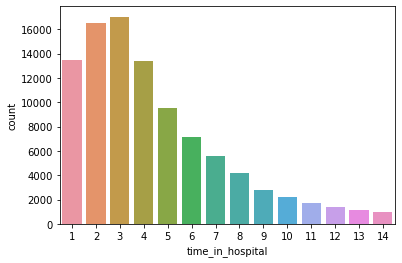

In [49]:
#This field shows how long patient stayed in hospital. 
#Show count of each period
sns.countplot(x = 'time_in_hospital', data = DiabeticDataset)

### Payer Code

As we've seen earlier in our missing value percentages for each column, Payer code has 39% of missing values. Also, this field mainly shows the insurance provider of each patient (how patient paid) this logically has no impact on our prediction. We will later drop this field

<AxesSubplot:xlabel='payer_code', ylabel='count'>

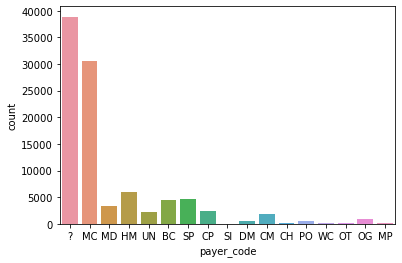

In [50]:
#Show Payer_code Distribution
#Null values has the highest amount. We will drop this field
sns.countplot(x = 'payer_code', data = DiabeticDataset)

### Medical Specialty

Medical specialty has around 71 different categories and 49% missing values. We could see for the results below that the vast majority of rows in this fields are missing values. So we decided to drop this field although it might have some impact on our prediction

In [51]:
#print distribution of medical specialty and sort values descending order
print('Number medical specialty:', DiabeticDataset.medical_specialty.nunique())
DiabeticDataset.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
?                                47461
InternalMedicine                 13805
Emergency/Trauma                  7395
Family/GeneralPractice            7085
Cardiology                        5175
                                 ...  
Speech                               1
Pediatrics-InfectiousDiseases        1
SportsMedicine                       1
Proctology                           1
Neurophysiology                      1
Length: 73, dtype: int64

### Num Lab Procedures, Medication, outpatient, emergency, inpatient

No changes required for for: Num_lab_procedures, num_procedure, num_medication, num_outpatient, num_emergency, num_inpatient.

In [52]:
#Number of lab tests performed at the visit
DiabeticDataset.num_lab_procedures.value_counts()

1      3091
43     2699
44     2399
45     2283
38     2131
       ... 
114       1
118       1
129       1
120       1
121       1
Name: num_lab_procedures, Length: 118, dtype: int64

### Diag1, Diag2, Diag3

These 3 fields contain numerical values. Each range corresponds to a specific type of diagnose. We will use use rule that we found on "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." Research paper to map to numerical values to its right category. 1 => circulatory 2 => respiratory 3 => digestive 4 => diabetes 5 => injury 6 => musculoskeletal 7 => genitourinary 8 => neoplasms 9 => pregnecy 10 => other

[ 1  2  3  4  5  6  7  8  9 10] 

[ 1  2  3  4  5  6  7  8  9 10] 

[ 1  2  3  4  5  6  7  8  9 10] 



<AxesSubplot:xlabel='diag_3', ylabel='count'>

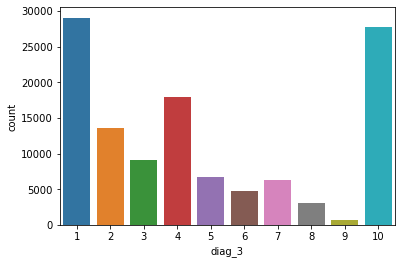

In [53]:
#Lets look for the most common value in each column
diag_1 = Counter(list(DiabeticDataset['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(DiabeticDataset['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(DiabeticDataset['diag_3'])).most_common(1)[0][0]

#Replace empty values by the most common one for each column
DiabeticDataset['diag_1'] = DiabeticDataset['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
DiabeticDataset['diag_2'] = DiabeticDataset['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
DiabeticDataset['diag_3'] = DiabeticDataset['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

#Map each value to its category for Diag1
DiabeticDataset['diag_1'] = DiabeticDataset['diag_1'].apply(lambda x : 10 if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else (1 if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     (2 if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     (3 if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     (4 if int(float(x)) == 250
                                        else     (5 if int(float(x)) in range(800, 1000)
                                        else (6 if int(float(x)) in range(710, 740)
                                        else (7 if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else (8 if int(float(x)) in range(140, 240)
                                        else (9 if int(float(x)) in range(630, 680)
                                        else 10))))))))))
#Map each value to its category for Diag2
DiabeticDataset['diag_2'] = DiabeticDataset['diag_2'].apply(lambda x : 10 if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else (1 if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     (2 if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     (3 if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     (4 if int(float(x)) == 250
                                        else     (5 if int(float(x)) in range(800, 1000)
                                        else (6 if int(float(x)) in range(710, 740)
                                        else (7 if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else (8 if int(float(x)) in range(140, 240)
                                        else (9 if int(float(x)) in range(630, 680)
                                        else 10))))))))))
#Map each value to its category for Diag3
DiabeticDataset['diag_3'] = DiabeticDataset['diag_3'].apply(lambda x : 10 if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else (1 if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     (2 if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     (3 if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     (4 if int(float(x)) == 250
                                        else     (5 if int(float(x)) in range(800, 1000)
                                        else (6 if int(float(x)) in range(710, 740)
                                        else (7 if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else (8 if int(float(x)) in range(140, 240)
                                        else (9 if int(float(x)) in range(630, 680)
                                        else 10))))))))))  
#Print the distributions for diag1, diag2, diag3
print(np.unique(DiabeticDataset['diag_1']), '\n')           
print(np.unique(DiabeticDataset['diag_2']), '\n')
print(np.unique(DiabeticDataset['diag_3']), '\n')
sns.countplot(x = 'diag_1', data = DiabeticDataset)
sns.countplot(x = 'diag_2', data = DiabeticDataset)
sns.countplot(x = 'diag_3', data = DiabeticDataset)

### Max Glucose Serum

Glucose test serum is a test result. We will map the possible results to numerical values. 200 for '>200' 300 for '>300' 100 for 'Norm' else 0

<AxesSubplot:xlabel='max_glu_serum', ylabel='count'>

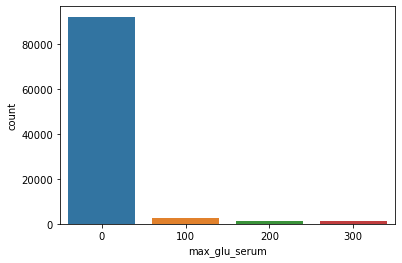

In [54]:
#map ranges to numerical values
DiabeticDataset['max_glu_serum'] = DiabeticDataset['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))
# print distribution of column
sns.countplot(x = 'max_glu_serum', data = DiabeticDataset)

### A1Cresult

A1C is a medical result we will map the possible ranges to a numerical value. 7 => '>7' 8 => '>8' 5 => 'Norm' else 0

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

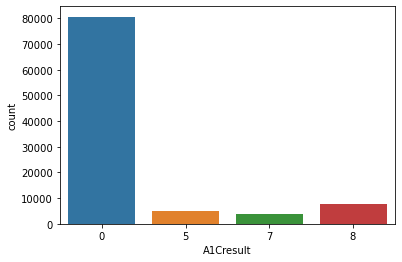

In [55]:
#Map ranges into numerical values
DiabeticDataset['A1Cresult'] = DiabeticDataset['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))
#Print distribution of column
sns.countplot(x = 'A1Cresult', data = DiabeticDataset)

### Medicaments Columns: 23 in total

The following 23 fields are all medicaments with same possible outcome (down, no, steady, up). We will map each category into a numeric value as follows: 10 => 'up' -10 => 'down' 0 => 'steady' Else -20

<AxesSubplot:xlabel='metformin', ylabel='count'>

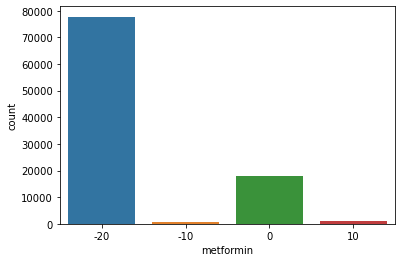

In [56]:
#For all medicaments columns, change the categorical outcomes to numerical values
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    DiabeticDataset[col] = DiabeticDataset[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))
    #show one example
sns.countplot(x = 'metformin', data = DiabeticDataset)

### Change

This column basically shows if there was a change in medics, we will map 1 for 'ch' and -1 for no

<AxesSubplot:xlabel='change', ylabel='count'>

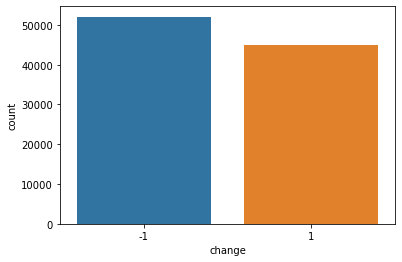

In [57]:
DiabeticDataset['change'] = DiabeticDataset['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)
#show results
sns.countplot(x = 'change', data = DiabeticDataset)

### DiabetesMed

This field basically shows if patient had any diabetes medications. We will map 1 for yes and -1 for no

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

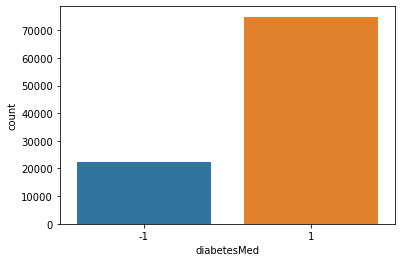

In [58]:
#map
DiabeticDataset['diabetesMed'] = DiabeticDataset['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)
#Show results
sns.countplot(x = 'diabetesMed', data = DiabeticDataset)

### Predicted Class: Readmitted

Our predicted class is the readmitted column. We chose our lables as follows: Readmitted in <30 => 1 else 0. The reason for this is that the government performs audits on hostpitals and they check they're readmission rates of less than 30 days. If it's high, the cut the government support budget. So this model will help hostpitals be more prepared. 

<AxesSubplot:xlabel='readmitted', ylabel='count'>

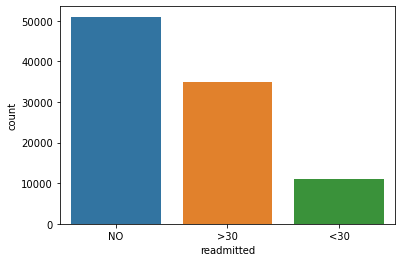

In [59]:
#Lets explore this field
sns.countplot(x = 'readmitted', data = DiabeticDataset)

<AxesSubplot:ylabel='readmitted'>

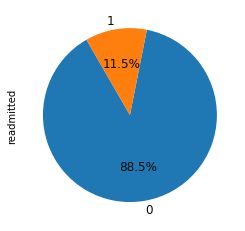

In [60]:
#map to 0 and 1
DiabeticDataset['readmitted'] = DiabeticDataset.readmitted.apply(lambda x: 1 if x == '<30' else 0)
#print results
DiabeticDataset.readmitted.value_counts().plot.pie(autopct="%1.1f%%", startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

We could see that our dataset is highly imbalanced with more non re-admitted case in less than 30.

### drop Duplicates Records

We have many duplicate records in our dataset as patients have duplicated recored when they are readmitted. We will drop them.

In [61]:
DiabeticDataset.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(DiabeticDataset))

Length after removing Duplicates: 68166


### Drop Columns with Missing Values

As discussed in previous sections, we decided to drop the following columns because of large number of missing values: Weight, Payer_code and medical specialty. We also need to drop encounter_id and patient_nbr as they are unique identifiers for patients thus not needed in our predictions.

In [62]:
#drop mentioned columns
DiabeticDataset = DiabeticDataset.drop(['weight','payer_code','medical_specialty', 'encounter_id', 'patient_nbr'], axis = 1)
#print columns of data set
DiabeticDataset.head(2).T

,0,1
race,1,1
gender,1,1
age,5,15
admission_type_id,5,1
discharge_disposition_id,25,1
admission_source_id,1,7
time_in_hospital,1,3
num_lab_procedures,41,59
num_procedures,0,0
num_medications,1,18


### Saving the data to CSV.

In [63]:
DiabeticDataset.to_csv('DiabeticDataset.csv')

### Data Analysis

Now that we prepared the data and set our y-label, we could perform some analysis

### Gender, age and Race insights

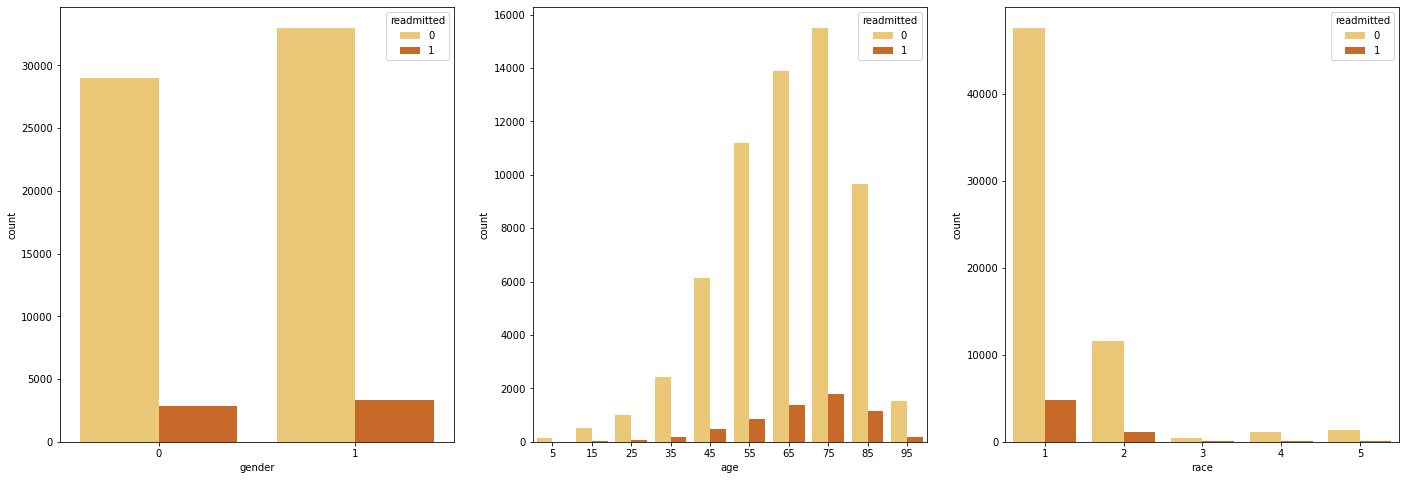

In [64]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(DiabeticDataset[i], hue=DiabeticDataset.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

We could see from the plots above that females have more chances of being readmitted in less than 30 days in general. 

In [65]:
DiabeticDataset.groupby(by = "insulin").readmitted.mean()

insulin
-20    0.083373
-10    0.106398
 0     0.093335
 10    0.098921
Name: readmitted, dtype: float64

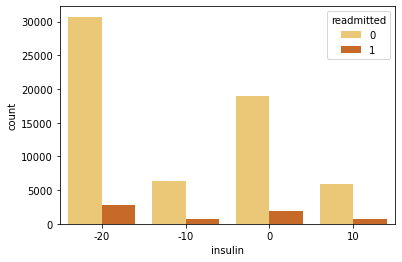

In [66]:
sns.countplot(x="insulin", hue="readmitted", data=DiabeticDataset, palette="YlOrBr")
plt.show()

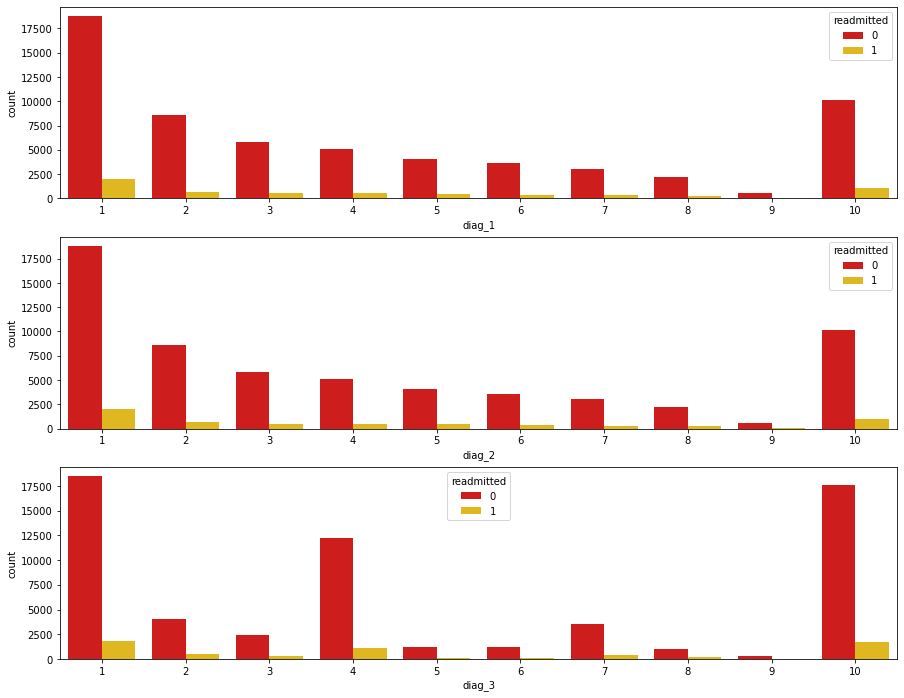

In [67]:
diag_list = ['diag_1','diag_2','diag_3']
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(DiabeticDataset[i], hue=DiabeticDataset.readmitted, palette='hot', ax=ax[count]);
    count = count+1